In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

from PIL import Image
import os

from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape to (batch, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

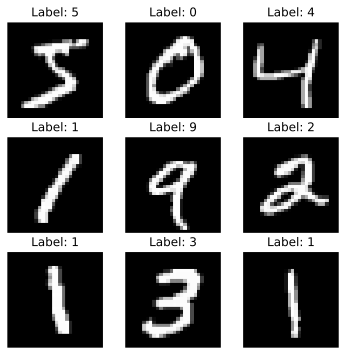

In [3]:
plt.figure(figsize=(6, 6))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

In [4]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, 
    test_size=0.1,      # 10% validation set
    random_state=42,    # reproducible
    stratify=y_train    # keeps class balance
)

In [5]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=3,          # stop after 3 epochs with no improvement
        restore_best_weights=True,
        verbose=1
    ),
    
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,          # reduce LR by half
        patience=2,          # wait 2 epochs before reducing LR
        min_lr=1e-6,         # lower bound on learning rate
        verbose=1
    )
]

In [6]:
dnn = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),

    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

dnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


2025-11-20 14:51:11.763239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
start_time = time.time()

history_dnn = dnn.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

end_time = time.time()
elapsed = end_time - start_time
print(f"Total training time: {elapsed:.2f} seconds")

Epoch 1/20
844/844 [==============================] - 4s 4ms/step - loss: 0.2491 - accuracy: 0.9267 - val_loss: 0.1319 - val_accuracy: 0.9630 - lr: 0.0010
Epoch 2/20
844/844 [==============================] - 3s 3ms/step - loss: 0.0963 - accuracy: 0.9703 - val_loss: 0.1092 - val_accuracy: 0.9687 - lr: 0.0010
Epoch 3/20
844/844 [==============================] - 3s 3ms/step - loss: 0.0667 - accuracy: 0.9790 - val_loss: 0.0976 - val_accuracy: 0.9718 - lr: 0.0010
Epoch 4/20
844/844 [==============================] - 3s 3ms/step - loss: 0.0505 - accuracy: 0.9835 - val_loss: 0.1074 - val_accuracy: 0.9702 - lr: 0.0010
Epoch 5/20
844/844 [==============================] - 3s 3ms/step - loss: 0.0399 - accuracy: 0.9868 - val_loss: 0.0938 - val_accuracy: 0.9723 - lr: 0.0010
Epoch 6/20
844/844 [==============================] - 3s 3ms/step - loss: 0.0301 - accuracy: 0.9899 - val_loss: 0.0926 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 7/20
844/844 [==============================] - 3s 3ms/step - lo

In [8]:
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [9]:
start_time = time.time()

history = cnn.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

end_time = time.time()
elapsed = end_time - start_time
print(f"Total training time: {elapsed:.2f} seconds")

Epoch 1/5
844/844 [==============================] - 20s 23ms/step - loss: 0.1899 - accuracy: 0.9437 - val_loss: 0.0795 - val_accuracy: 0.9767 - lr: 0.0010
Epoch 2/5
844/844 [==============================] - 21s 24ms/step - loss: 0.0517 - accuracy: 0.9834 - val_loss: 0.0559 - val_accuracy: 0.9847 - lr: 0.0010
Epoch 3/5
844/844 [==============================] - 21s 25ms/step - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.0519 - val_accuracy: 0.9838 - lr: 0.0010
Epoch 4/5
844/844 [==============================] - 20s 24ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0412 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 5/5
844/844 [==============================] - 20s 24ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0420 - val_accuracy: 0.9873 - lr: 0.0010
Total training time: 102.44 seconds


In [10]:
test_loss, test_acc = dnn.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9828
Test accuracy: 0.9828000068664551


In [11]:
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0333 - accuracy: 0.9895
Test accuracy: 0.9894999861717224


In [12]:
cnn_probs = cnn.predict(x_test)
dnn_probs = dnn.predict(x_test)

# True labels
y_true = y_test

313/313 [==============================] - 1s 1ms/step


In [13]:
y_test_bin = label_binarize(y_true, classes=list(range(10)))
n_classes = y_test_bin.shape[1]

In [14]:
cnn_fpr = {}
cnn_tpr = {}
cnn_auc = {}

dnn_fpr = {}
dnn_tpr = {}
dnn_auc = {}

for i in range(n_classes):
    cnn_fpr[i], cnn_tpr[i], _ = roc_curve(y_test_bin[:, i], cnn_probs[:, i])
    cnn_auc[i] = auc(cnn_fpr[i], cnn_tpr[i])

    dnn_fpr[i], dnn_tpr[i], _ = roc_curve(y_test_bin[:, i], dnn_probs[:, i])
    dnn_auc[i] = auc(dnn_fpr[i], dnn_tpr[i])

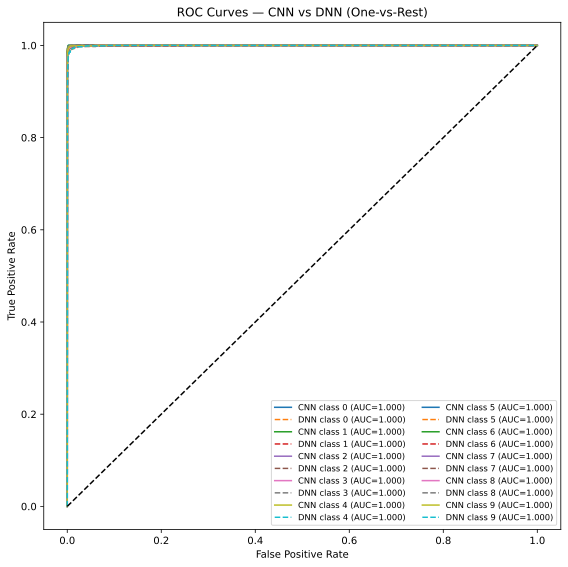

In [15]:
plt.figure(figsize=(8, 8))

for i in range(n_classes):
    plt.plot(cnn_fpr[i], cnn_tpr[i], 
             label=f"CNN class {i} (AUC={cnn_auc[i]:.3f})")
    plt.plot(dnn_fpr[i], dnn_tpr[i], linestyle='--',
             label=f"DNN class {i} (AUC={dnn_auc[i]:.3f})")

plt.plot([0, 1], [0, 1], 'k--')  # diagonal baseline

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — CNN vs DNN (One-vs-Rest)")
plt.legend(ncol=2, fontsize="small")
plt.tight_layout()

In [32]:
def preprocess_image(path):
    # Load image
    img = Image.open(path).convert('L')  # convert to grayscale
    # Resize to 28x28
    img = img.resize((28, 28))
    # Convert to numpy array and scale
    img_array = np.array(img).astype('float32') / 255.0
    # Add channel dimension
    img_array = img_array.reshape(1, 28, 28, 1)
    img_array = 1.0 - img_array
    return img_array

In [42]:
# Example: a single hand-drawn digit
img_path = "mydigit_2.png"

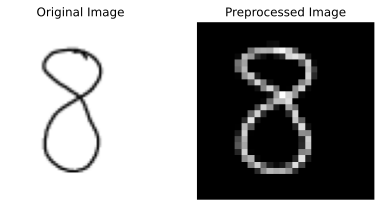

In [43]:
original_img = Image.open(img_path)

# Preprocess image
preprocessed_img = preprocess_image(img_path)  # shape (1,28,28,1)
preprocessed_img_plot = preprocessed_img[0, :, :, 0]  # remove batch and channel dims

# Plot side by side
plt.figure(figsize=(6, 3))

# Original
plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Preprocessed
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_img_plot, cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')

plt.tight_layout()

In [44]:
# Predict with CNN
pred_cnn = cnn.predict(preprocessed_img)
print("CNN predicts:", np.argmax(pred_cnn))

# Predict with DNN
pred_dnn = dnn.predict(preprocessed_img)
print("DNN predicts:", np.argmax(pred_dnn))

1/1 [==============================] - 0s 23ms/step
CNN predicts: 8
1/1 [==============================] - 0s 21ms/step
DNN predicts: 8
